In [69]:
import pickle
import sys
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import ast

sys.path.append("../autokite")
with open("../coordinates/semikite/20250829coordinates_semikite_yx.pckl", "rb") as f:
    coordinates_semikite = pickle.load(f)

coordinates_autokite = pd.read_csv(
    "../coordinates/autokite/coordinates_with_angles_20250829.csv",
    index_col="time"
)

#Filter data before 20250829_111200
cutoff_time = "20250829_111200"
coordinates_autokite = coordinates_autokite[coordinates_autokite.index <= cutoff_time]
coordinates_semikite = coordinates_semikite[coordinates_semikite.index <= cutoff_time]

All times: Counter({False: 619})
Kite found times: Counter({True: 598, False: 21})


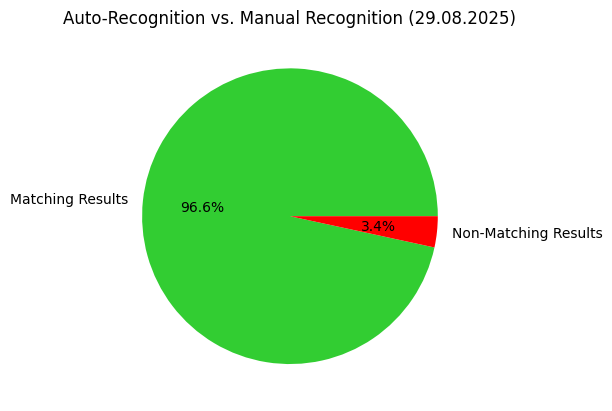

In [79]:
#isolate the timestamps
#times = coordinates_autokite.index.tolist()
times = sorted(set(coordinates_autokite.index) & set(coordinates_semikite.index))


def to_xy(val):
    """Convert a coordinate value into a tuple (a, b). Works for string, list, tuple, np.array, or Series."""
    if isinstance(val, str):
        xy = ast.literal_eval(val)
        return xy[0], xy[1]
    if isinstance(val, (list, tuple, np.ndarray)):
        return val[0], val[1]
    try:
        return val.iloc[0], val.iloc[1]
    except Exception:
        raise ValueError(f"Unexpected coordinate type: {type(val)} -> {val}")

# Identify times where a kite was manually detected in semikite
times_kite_found = []
for t in times:
    y2, x2 = to_xy(coordinates_semikite.loc[t, "coordinates"])
    if (x2 > 15) and (y2 > 15):
        times_kite_found.append(t)

# Compare autokite vs semikite for all times
equality = {}
for t in times:
    x1, y1 = to_xy(coordinates_autokite.loc[t, "coordinates [x,y]"])
    # Swap autokite (x, y) to (y, x) to match semikite
    y1, x1 = x1, y1
    y2, x2 = to_xy(coordinates_semikite.loc[t, "coordinates"])
    equality[t] = (abs(x1 - x2) < 10) and (abs(y1 - y2) < 10)

# Count True/False for all times
counts = Counter(equality.values())
print("All times:", counts)

# Compare autokite vs semikite for all times with ±10 tolerance
equality_kite_found = {}

for time in times:
    if time in times_kite_found:
        coords1 = coordinates_autokite.loc[time, "coordinates [x,y]"]
        coords2 = coordinates_semikite.loc[time, "coordinates"]

        # to_xy fonksiyonunu kullan
        x1, y1 = to_xy(coords1)       # CSV (x, y)
        y2, x2 = to_xy(coords2)       # Pickle (y, x)

        if (x2 - 35 <= x1 <= x2 + 35) and (y2 - 35 <= y1 <= y2 + 35):
            equality_kite_found[time] = True
        else:
            equality_kite_found[time] = False

counts_kite = Counter(equality_kite_found.values())
print("Kite found times:", counts_kite)

# Pie chart
match = counts_kite.get(True, 0)
nonmatch = counts_kite.get(False, 0)

plt.pie([match, nonmatch],
        labels=["Matching Results", "Non-Matching Results"],
        autopct="%1.1f%%",
        colors=["limegreen", "red"])
plt.title("Auto-Recognition vs. Manual Recognition (29.08.2025)")

save_path_1 = "../semikite/recognition_comparison.png"
plt.savefig(save_path_1, dpi=300, bbox_inches='tight')
plt.show()

In [54]:
oordinates_autokite

,"coordinates [x,y]",elevation,azimuth
time,,,
20250829_092900,"[1759, 1050]",242,354
20250829_092910,"[1745, 1055]",240,353
20250829_092920,"[1741, 1061]",240,353
20250829_092930,"[1717, 1109]",238,349
20250829_092940,"[1681, 1151]",235,345
...,...,...,...
20250829_111120,"[1790, 1040]",245,354
20250829_111130,"[1767, 1059]",243,353
20250829_111140,"[1756, 1158]",244,346


In [55]:
coordinates_semikite

,coordinates
time,
20250829_092900,"[1034, 1761]"
20250829_092910,"[1039, 1742]"
20250829_092920,"[1062, 1734]"
20250829_092930,"[1104, 1717]"
20250829_092940,"[1146, 1675]"
...,...
20250829_111120,"[1017, 1784]"
20250829_111130,"[1077, 1769]"
20250829_111140,"[1156, 1749]"


In [73]:
#isolate the timestamps
times = sorted(set(coordinates_autokite.index) & set(coordinates_semikite.index))

# Initialize non_matching_times list
non_matching_times = []

def to_xy(val):
    """Convert a coordinate value into a tuple (a, b). Works for string, list, tuple, np.array, or Series."""
    if isinstance(val, str):
        xy = ast.literal_eval(val)
        return xy[0], xy[1]
    if isinstance(val, (list, tuple, np.ndarray)):
        return val[0], val[1]
    try:
        return val.iloc[0], val.iloc[1]
    except Exception:
        raise ValueError(f"Unexpected coordinate type: {type(val)} -> {val}")

# Identify times where a kite was manually detected in semikite
times_kite_found = []
for t in times:
    y2, x2 = to_xy(coordinates_semikite.loc[t, "coordinates"])
    if (x2 > 15) and (y2 > 15):
        times_kite_found.append(t)

# Compare autokite vs semikite for all times with ±30 tolerance
equality_kite_found = {}

for time in times:
    if time in times_kite_found:
        coords1 = coordinates_autokite.loc[time, "coordinates [x,y]"]
        coords2 = coordinates_semikite.loc[time, "coordinates"]

        # Use to_xy function
        x1, y1 = to_xy(coords1)       # CSV (x, y)
        y2, x2 = to_xy(coords2)       # Pickle (y, x)

        if (x2 - 35 <= x1 <= x2 + 35) and (y2 - 35 <= y1 <= y2 + 35):
            equality_kite_found[time] = True
        else:
            equality_kite_found[time] = False
            # Record non-matching times
            non_matching_times.append(time)

# Sadece non-matching zamanları yazdır
print("NON-MATCHING ZAMANLARI:")
print("=" * 30)
for i, time in enumerate(non_matching_times, 1):
    print(f"{i}. {time}")

NON-MATCHING ZAMANLARI:
1. 20250829_093610
2. 20250829_094530
3. 20250829_094650
4. 20250829_100230
5. 20250829_102620
6. 20250829_102800
7. 20250829_103750
8. 20250829_104130
9. 20250829_105300
10. 20250829_105310
11. 20250829_105320
12. 20250829_105330
13. 20250829_105340
14. 20250829_105350
15. 20250829_111030
16. 20250829_111040
17. 20250829_111050
18. 20250829_111100
19. 20250829_111110
20. 20250829_111150
21. 20250829_111200


In [74]:
#isolate the timestamps
times = sorted(set(coordinates_autokite.index) & set(coordinates_semikite.index))

# Initialize non_matching_times list
non_matching_times = []

def to_xy(val):
    """Convert a coordinate value into a tuple (a, b). Works for string, list, tuple, np.array, or Series."""
    if isinstance(val, str):
        xy = ast.literal_eval(val)
        return xy[0], xy[1]
    if isinstance(val, (list, tuple, np.ndarray)):
        return val[0], val[1]
    try:
        return val.iloc[0], val.iloc[1]
    except Exception:
        raise ValueError(f"Unexpected coordinate type: {type(val)} -> {val}")

# Identify times where a kite was manually detected in semikite
times_kite_found = []
for t in times:
    y2, x2 = to_xy(coordinates_semikite.loc[t, "coordinates"])
    if (x2 > 15) and (y2 > 15):
        times_kite_found.append(t)

# Compare autokite vs semikite for all times with ±30 tolerance
equality_kite_found = {}
non_matching_details = []  # List to store detailed information

for time in times:
    if time in times_kite_found:
        coords1 = coordinates_autokite.loc[time, "coordinates [x,y]"]
        coords2 = coordinates_semikite.loc[time, "coordinates"]

        # Use to_xy function
        x1, y1 = to_xy(coords1)       # CSV (x, y)
        y2, x2 = to_xy(coords2)       # Pickle (y, x)

        if (x2 - 35 <= x1 <= x2 + 35) and (y2 - 35 <= y1 <= y2 + 35):
            equality_kite_found[time] = True
        else:
            equality_kite_found[time] = False
            # Record non-matching times with coordinates
            non_matching_details.append({
                'time': time,
                'autokite_x': x1,
                'autokite_y': y1,
                'semikite_x': x2,
                'semikite_y': y2,
                'diff_x': abs(x1 - x2),
                'diff_y': abs(y1 - y2)
            })

# Print non-matching times and coordinates
print("NON-MATCHING TIMES AND COORDINATES:")
print("=" * 90)
print(f"{'No':<4} {'Time':<15} {'AutoKite':<15} {'SemiKite':<15} {'Diff (x,y)':<15}")
print("-" * 90)

for i, detail in enumerate(non_matching_details, 1):
    print(f"{i:<4} {detail['time']:<15} ({detail['autokite_x']:3d},{detail['autokite_y']:3d})  ({detail['semikite_x']:3d},{detail['semikite_y']:3d})  ({detail['diff_x']:2d},{detail['diff_y']:2d})")

# Statistics
print("\n" + "=" * 90)
print("STATISTICS:")
print(f"Total non-matching records: {len(non_matching_details)}")
if non_matching_details:
    avg_diff_x = sum(d['diff_x'] for d in non_matching_details) / len(non_matching_details)
    avg_diff_y = sum(d['diff_y'] for d in non_matching_details) / len(non_matching_details)
    max_diff_x = max(d['diff_x'] for d in non_matching_details)
    max_diff_y = max(d['diff_y'] for d in non_matching_details)

    print(f"Average x difference: {avg_diff_x:.1f}")
    print(f"Average y difference: {avg_diff_y:.1f}")
    print(f"Maximum x difference: {max_diff_x}")
    print(f"Maximum y difference: {max_diff_y}")

NON-MATCHING TIMES AND COORDINATES:
No   Time            AutoKite        SemiKite        Diff (x,y)     
------------------------------------------------------------------------------------------
1    20250829_093610 (928,411)  (1687,1181)  (759,770)
2    20250829_094530 (515,1688)  (1635,1146)  (1120,542)
3    20250829_094650 (1072,1356)  (1657,1161)  (585,195)
4    20250829_100230 (1718,1163)  (1643,1084)  (75,79)
5    20250829_102620 (327,1504)  (1722,1005)  (1395,499)
6    20250829_102800 (852,1798)  (1737,1054)  (885,744)
7    20250829_103750 (1212,888)  (1700,1111)  (488,223)
8    20250829_104130 (228,1416)  (1836,992)  (1608,424)
9    20250829_105300 (767,1787)  (1823,1096)  (1056,691)
10   20250829_105310 (1085,732)  (1838,1099)  (753,367)
11   20250829_105320 (1085,732)  (1831,1104)  (746,372)
12   20250829_105330 (158,1281)  (1841,1101)  (1683,180)
13   20250829_105340 (1084,731)  (1828,1079)  (744,348)
14   20250829_105350 (1084,731)  (1831,1049)  (747,318)
15   20250829_111